In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Value Iteration Algorithm for the Gambler Problem

## Problem : 

***
A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money. On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. 
***

## Problem as Finite MDP:

***
This problem can be formulated as an undiscounted, episodic, finite MDP. The state is the gambler’s capital, $s \in \{1,2,...,99\}$ and the actions are stakes,$a \in \{0, 1, . . . , min(s, 100 − s)\}$ and let $p_h$ be the probability that we get haids at the coin flip,The reward is zero on all transitions except those on which the gambler reaches his goal, when it is $1$.

A particular finite MDP is defined by its state and action sets and by the one-step dynamics of the environment. Given any state and action s and a, the probability of each possible pair of next state and reward, s′, r, is denoted

$$ p(s',r|s,a)=\mathbb{P}({S_{t+1}=s',R_{t+1} =r|S_t=s,A_t=a}) $$

In this problem we define the one-step dynamics of the environment as follows , in a state $s$ taking an action $a\in \{0 \dots min(s,100-s)\}$ , the probability that we win and move to the state $s'=a+s$ is $p_h$ and in the other case $1-p_h$:

$$\begin{cases}
\mathbb{P}(s+a,0| s,a) = p_h \; if \; s+a<100\\
\mathbb{P}(s+a,1|s,a) = p_h\; if \;s+a=100\\
\mathbb{P}(s-a,0|s,a) = 1-p_h


\end{cases}

$$ 
***


## Definitions :

### Policy : 

we call a policy  $\pi$ a mapping from the state space to a probabiltiy of taking an action $a$ in a state $s$
in this perticular problem we use a $deterministic$ policy where for each state $s$  we get a specific action $a$

### Value of state: 

we note the value of a state $v_{\pi}$ and we define it as follows :
$$ v_{\pi}(s) = \mathbb{E}_{\pi}(G_t|S_t = s) = \mathbb{E}_{\pi} (\sum_{k=t+1}^T R_k|S_t = s) \; where\;R_t\;represents \;the\;reward\;in\;episode\;t$$ 

$v_{\pi}$ follows the following Bellman equation:
$$ v_{\pi}(s) = \sum_a \pi(a|s) \sum_{s',r} p(s',r|s,a) (r+v_{\pi}(s'))$$

we also note the value of a state and action $q_(\pi)$ and we define it as follows :
$$ q_{\pi}(s,a) = \mathbb{E}_{\pi}(G_t| S_t =s ,A_t = a)$$

### Optimum Policy:
$$\pi \ge \pi' \iff v_{\pi}(s) \ge v_{\pi'}(s) \;\forall \;s\in S;$$

the value of a state for the optimum policy is a value function where we get the expected return of the best possible action $i.e : $

$$
\begin{align*}
v_*(s)  &= max_a q(s,a)\\
        &= max_a \mathbb{E}(R_{t+1} + \sum_{k\in [t+2,T]}R_k | S_t = s,A_t = a)\\
        &=max_a \mathbb{E}(R_{t+1} + v_*(S_{t+1})| S_t = s,A_t = a) \;(Changing\;the\;variable\;t\;to\;t+1)\\
        &= max_ a\sum _{r,s'} p(s',r|s,a)(r+v_*(s'))
\end{align*}
$$
and by the $policy \;imporevement\;theorem$ 

$$ \pi_* (s) = argmax_a \sum _{r,s'} p(s',r|s,a)(r+v_*(s'))$$

### Value iteration

***

In ordre for us to get the optimum policy we need to evaluate it and calculate the value function using a recursive approach and the following sequence
$$ v_{k+1}(s) =  max_ a\sum _{r,s'} p(s',r|s,a)(r+v_{k}(s'))$$ 
that converges to $v_*$ and at each episode we evaluate $\pi_*(s)$

***



In [6]:
def train(ph,theta=0.2):
    # init : 
    v = [0]*100
    pi = [0]*100
    while True:
        delta = 0
        for s in range(1,100):
            old_v = v[s]
            lsvtemp = [0]*(max(s,100-s)+1)
            
            for a in range(1,min(s,100-s)+1):

                if a+s <100:
                    lsvtemp[a] += ph*(0+v[s+a])
                    lsvtemp[a]+= ph*(0+v[s-a])
                if a+s == 100:
                    lsvtemp[a]   += ph
                    
                    lsvtemp[a] += ph*(0+v[s-a])
            v[s] = lsvtemp[np.argmax(lsvtemp)]
            pi[s] = np.argmax(lsvtemp)
            delta = max(delta, abs(v[s]-old_v))
        if delta < theta:
            break 
    return v,pi
            
                

for $p_h=0.4$ and different $\theta$ values

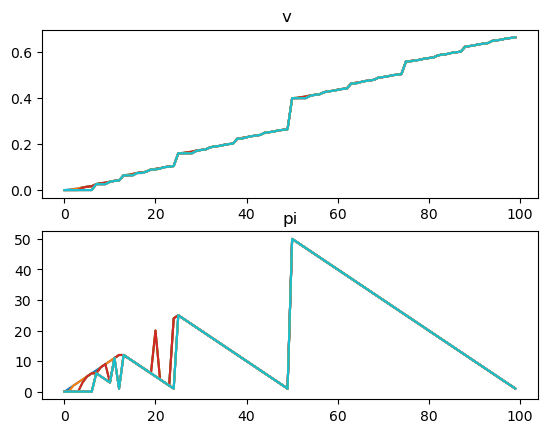

In [27]:
thethas = np.linspace(0.001,0.1,10)
fig, (ax1,ax2) = plt.subplots(2)
ax1.set_title("v ")
ax2.set_title("pi")
for (i,th) in enumerate(thethas):
    v,pi = train(0.4,th)
    
    ax1.plot(range(0,100),v)
    ax2.plot(range(0,100),pi)
    
    



We can also toy around a bit with the reward choice here and maybe change it to the following distribution:
$$
\begin{cases}
    r = -1 \;if\;s\ne 100\\
    r = 0 \;otherwise
\end{cases}
$$

# The problem as a n-bandit problem
we can also suppose that we don't know the probabilty of the coin toss and formulate the problem at each different state as a $min(s,100-s)$-bandit problem a non stationary one of course and use an $UCB$ Action selector Algorithmor or any other one 

To be Continued..